# Problem Statement
The customer churn dataset is a collection of customer data that focuses on predicting customer churn, which refers to the tendency of customers to stop using a company's products or services. The dataset contains various features that describe each customer, such as their credit score, country, gender, age, tenure, balance, number of products, credit card status, active membership, estimated salary, and churn status. The churn status indicates whether a customer has churned or not. The dataset is used to analyze and understand factors that contribute to customer churn and to build predictive models to identify customers at risk of churning. The goal is to develop strategies and interventions to reduce churn and improve customer retention

The dataset with 10000 records has the following columns:
* customer_id'
* 'credit_score'
* 'country', 
* 'gender', 
* 'age', 
* 'tenure':working experience
* 'balance', 
* 'products_number': how many product does the customer hold?
* 'credit_card': 1 means the cusstomer has the credict card while 0 means the customer does not; 
* 'active_member',: 1 means yes while 0 means no;
* 'estimated_salary', 
* 'churn'
#  Some questions can be asked:
*  what are the customer features? (cuntry/age/gender/tenure/estimated salary)
* what are customers' financial situation?
* churn classification

    

# 1. Import libraries

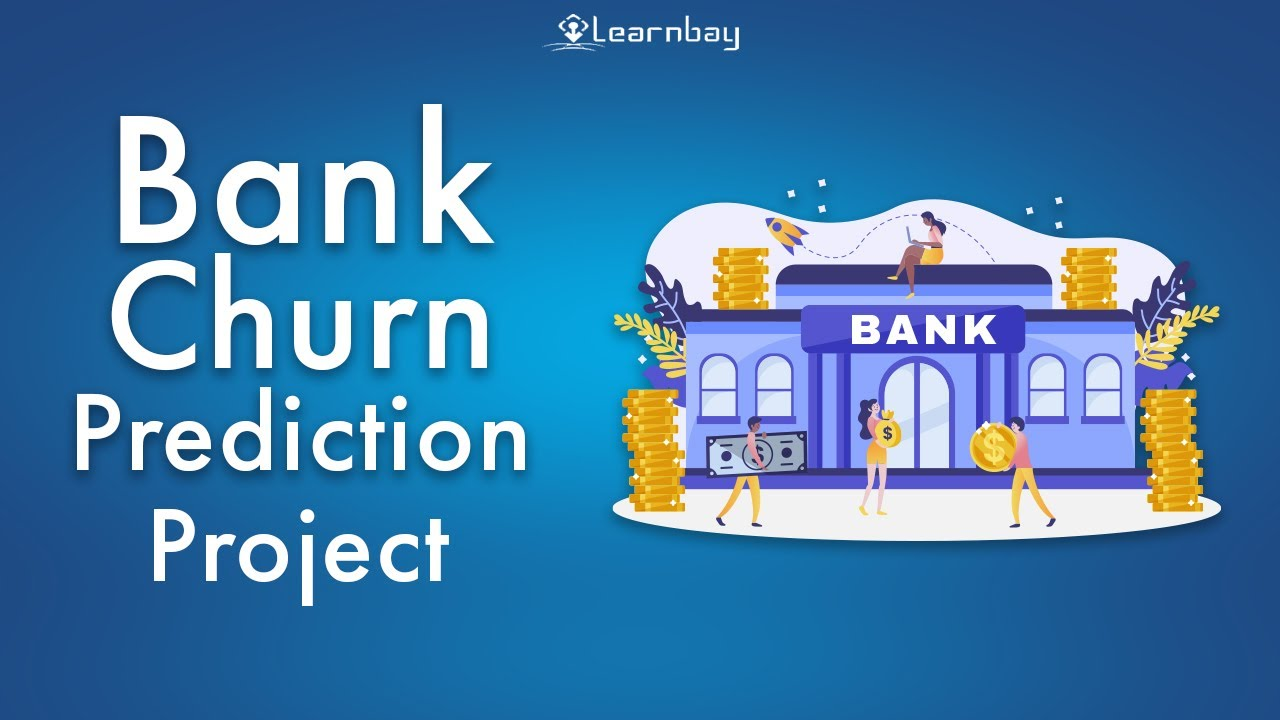

In [1]:
from IPython.display import display, HTML, Image

Image("maxresdefault.jpg")


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.metrics import confusion_matrix
plt.style.use('seaborn')

# 2. load data

In [3]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      9917 non-null   float64
 2   country           9827 non-null   object 
 3   gender            10000 non-null  object 
 4   age               9873 non-null   float64
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [5]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,9917.000000,9873.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.599980,38.928796,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.613545,10.475075,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.duplicated().sum()

0

* no missing value and no deplulicated values. 

# 3. EDA

3.1 Customer

we are going to check the churn customer dataset

In [7]:
df_churn = df[df['churn']==1]
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       2037 non-null   int64  
 1   credit_score      2024 non-null   float64
 2   country           1999 non-null   object 
 3   gender            2037 non-null   object 
 4   age               2009 non-null   float64
 5   tenure            2037 non-null   int64  
 6   balance           2037 non-null   float64
 7   products_number   2037 non-null   int64  
 8   credit_card       2037 non-null   int64  
 9   active_member     2037 non-null   int64  
 10  estimated_salary  2037 non-null   float64
 11  churn             2037 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 206.9+ KB


## MISSING VALUES ANALYSIS

In [8]:
df['credit_score'].fillna(df['credit_score'].median(), inplace=True)
df['country'].fillna(df['country'].mode()[0],inplace = True)
df['age'].fillna(df['age'].median(), inplace=True)


* Country

In [9]:
df_churn['country'].nunique()

3

In [10]:
def count_frequency(data, x):
    data1 =data[x].value_counts().reset_index()
    data1.columns= [x, 'count']
    data1['frequency'] = data1['count']/sum(data1['count'])*100
    data1=data1.sort_values(x)
    return data1

In [11]:
def count_fre_plot(data, x):
    fig, ax= plt.subplots(figsize=(12,6))
    ax = sns.barplot(data=data, x=x, y='count')
    ax2 =ax.twinx()
    sns.lineplot(data =data, x=x,y='frequency', color='r',marker= 'o', ax=ax2)
    for n, i in enumerate(data['frequency']):
        ax2.text(n, i ,str(round(i,2))+"%", va='bottom', ha='center')
    plt.show()

In [12]:
country =count_frequency(df_churn, 'country')
country

,country,count,frequency
0,France,1714,85.742871
1,Germany,175,8.754377
2,Spain,110,5.502751


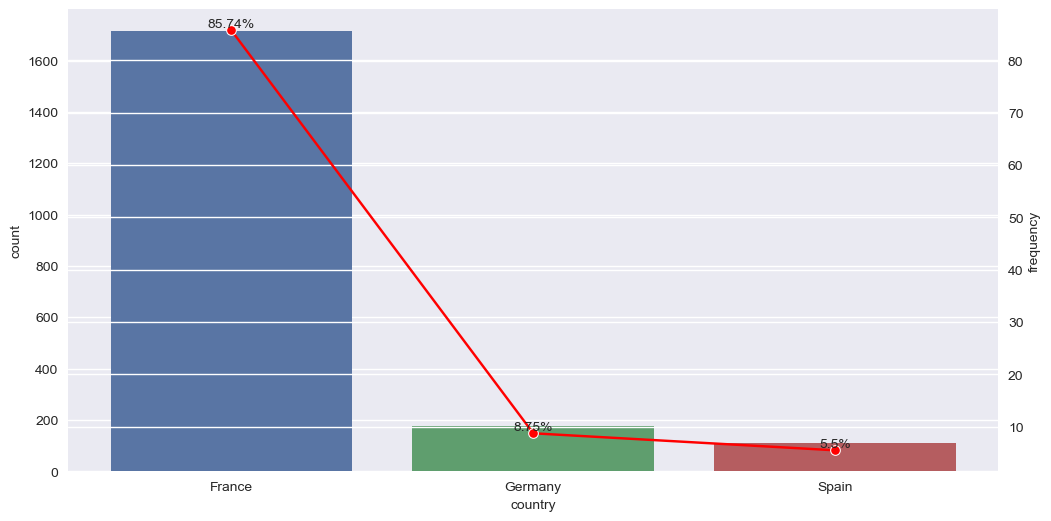

In [13]:
count_fre_plot(country, 'country')

* There are only 2037 customers in 10000 records;
* There are around 9% of Germany customers among 10000 records of churn cusotmers are from Germany;
* Around 95% of churn customers are from Germany and France;

* Gender 

In [14]:
df['gender'].value_counts(normalize=True)

Male      0.5457
Female    0.4543
Name: gender, dtype: float64

In [15]:
df_churn['gender'].value_counts(normalize=True)

Female    0.559156
Male      0.440844
Name: gender, dtype: float64

* tenure

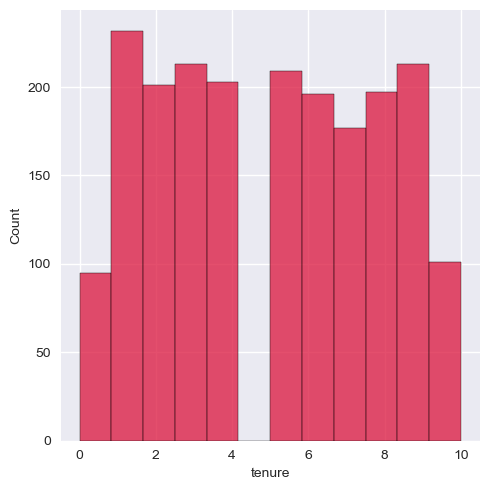

In [16]:
sns.displot(data=df_churn, x='tenure',color= 'crimson')

* age

In [17]:
df_churn['age'].describe()

count    2009.000000
mean       44.811847
std         9.755193
min        18.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: age, dtype: float64

In [18]:
df_churn['age_']=pd.cut(df_churn['age'], bins=5)
df_churn['age_'].value_counts(normalize=True)

(44.4, 57.6]      0.410652
(31.2, 44.4]      0.399204
(57.6, 70.8]      0.096068
(17.934, 31.2]    0.089099
(70.8, 84.0]      0.004978
Name: age_, dtype: float64

In [19]:
age = count_frequency(df_churn, 'age_')
age

,age_,count,frequency
3,"(17.934, 31.2]",179,8.909905
1,"(31.2, 44.4]",802,39.920358
0,"(44.4, 57.6]",825,41.065207
2,"(57.6, 70.8]",193,9.606770
4,"(70.8, 84.0]",10,0.497760


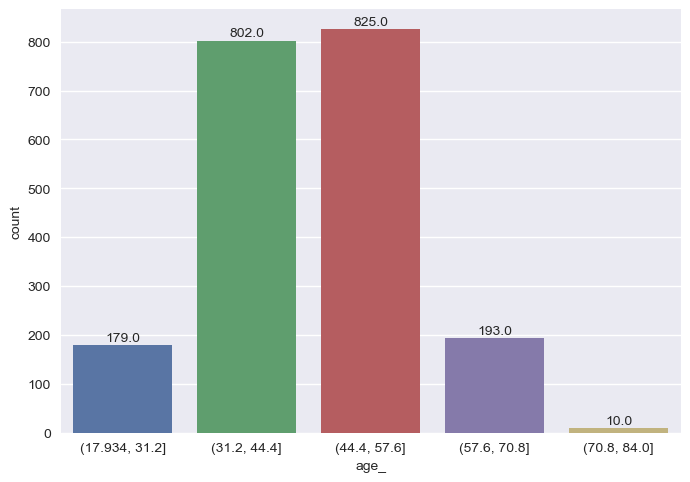

In [20]:
ax=sns.countplot(data=df_churn, x='age_')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

* Churn customers are between 18 and 84 years old;
* Over 80% of churn customers are betwwen 31 and 57 years old;

* estimated salary

In [21]:
df_churn['estimated_salary'].describe()

count      2037.000000
mean     101465.677531
std       57912.418071
min          11.580000
25%       51907.720000
50%      102460.840000
75%      152422.910000
max      199808.100000
Name: estimated_salary, dtype: float64

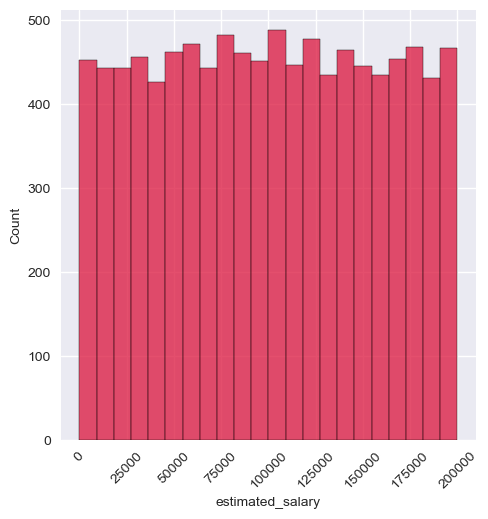

In [22]:

sns.displot(data=df, x='estimated_salary',color='crimson')
plt.xticks(rotation=45)
plt.show()

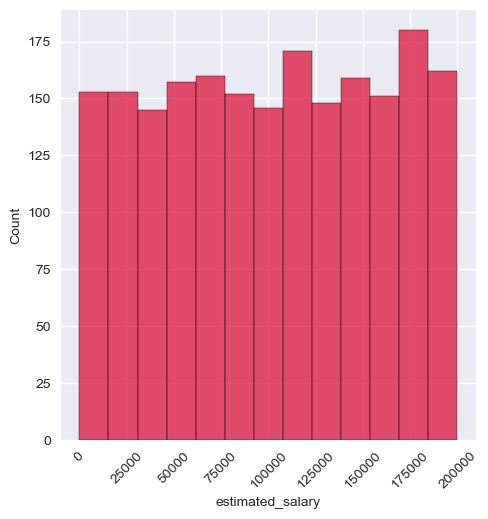

In [23]:

sns.displot(data=df_churn, x='estimated_salary',color = 'crimson')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='estimated_salary'>

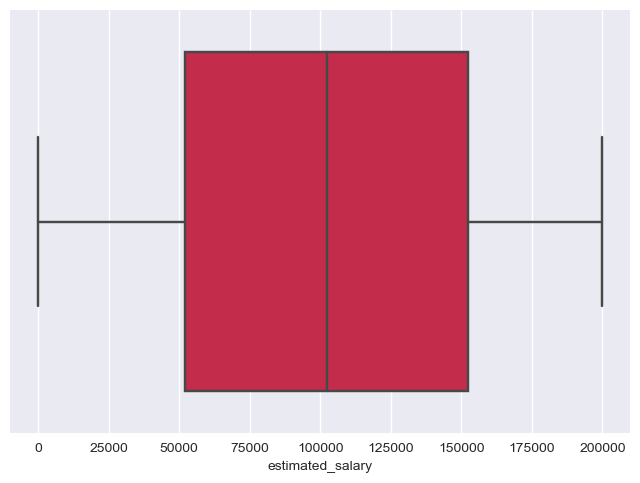

In [24]:
sns.boxplot(data=df_churn, x='estimated_salary',color='crimson')

* The distribution of estimated salary tend to be even.

3.2 service situation 

In [26]:
df_churn.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn', 'age_'],
      dtype='object')

* credit_score

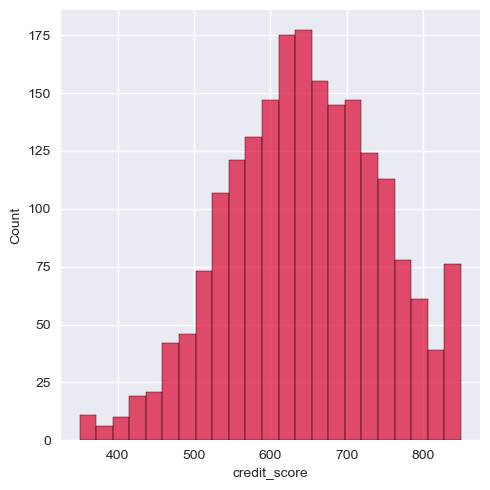

In [27]:
sns.displot(data=df_churn,x='credit_score',color='crimson' )

<Axes: xlabel='credit_score'>

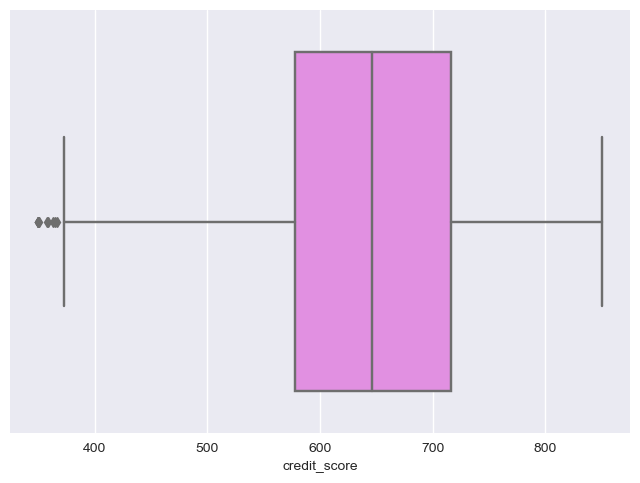

In [28]:
sns.boxplot(data=df_churn,x='credit_score' ,color ="violet")

<Axes: xlabel='credit_score'>

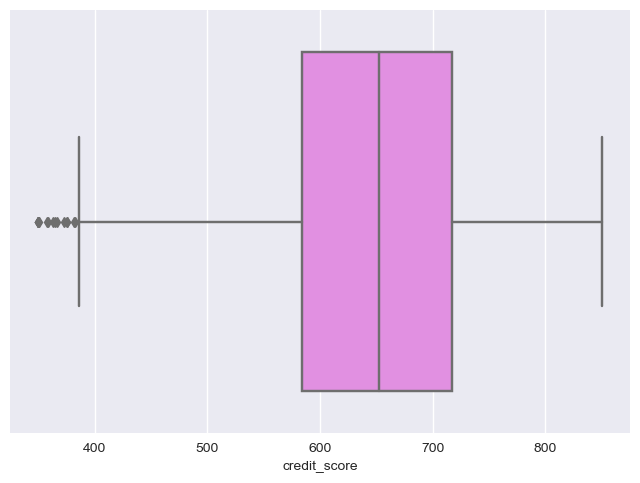

In [29]:
sns.boxplot(data=df,x='credit_score' ,color ='violet')

In [30]:
def find_outliers(data, x):
    q1=np.percentile(data[x], 25)
    q3=np.percentile(data[x], 75)
    iqr = q3-q1
    data1 =data[(data[x]<q1-1.5*iqr)|(data[x]>q3+1.5*iqr)][x].value_counts()
    return data1
    

In [31]:
find_outliers(df, 'credit_score')

350.0    5
376.0    2
363.0    1
359.0    1
358.0    1
351.0    1
365.0    1
383.0    1
367.0    1
382.0    1
373.0    1
Name: credit_score, dtype: int64

In [32]:
def remove_outliers(data, x):
    q1=np.percentile(data[x], 25)
    q3=np.percentile(data[x], 75)
    iqr = q3-q1
    data1 =data[(data[x]>=q1-1.5*iqr)&(data[x]<=q3+1.5*iqr)]
    return data1
    

In [33]:
df1 =remove_outliers(df, 'credit_score')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9984 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9984 non-null   int64  
 1   credit_score      9984 non-null   float64
 2   country           9984 non-null   object 
 3   gender            9984 non-null   object 
 4   age               9984 non-null   float64
 5   tenure            9984 non-null   int64  
 6   balance           9984 non-null   float64
 7   products_number   9984 non-null   int64  
 8   credit_card       9984 non-null   int64  
 9   active_member     9984 non-null   int64  
 10  estimated_salary  9984 non-null   float64
 11  churn             9984 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1014.0+ KB


* There are 11 cutomers who have lower credit score than majerity of churn customers while there are only 15 customers who have comparetively low credict scores. 
* remove the outliers in credit score

* products_number

In [34]:
product_num = count_frequency(df_churn, 'products_number')
product_num

,products_number,count,frequency
0,1,1409,69.170349
1,2,348,17.083947
2,3,220,10.800196
3,4,60,2.945508


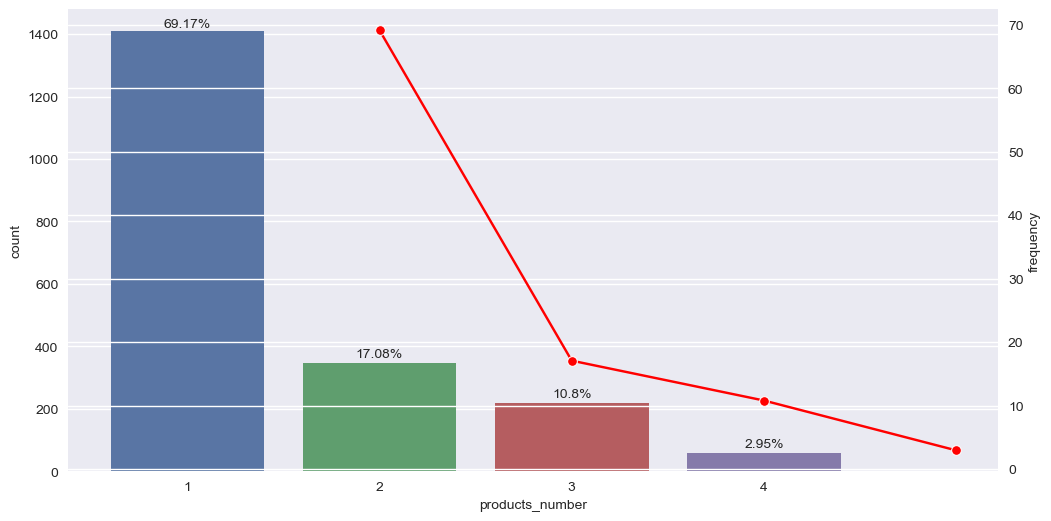

In [35]:
count_fre_plot(product_num, 'products_number')

* 70% of customers only have one product service

* credit card

In [36]:
cre_card = count_frequency(df_churn, 'credit_card')
cre_card

,credit_card,count,frequency
1,0,613,30.093274
0,1,1424,69.906726


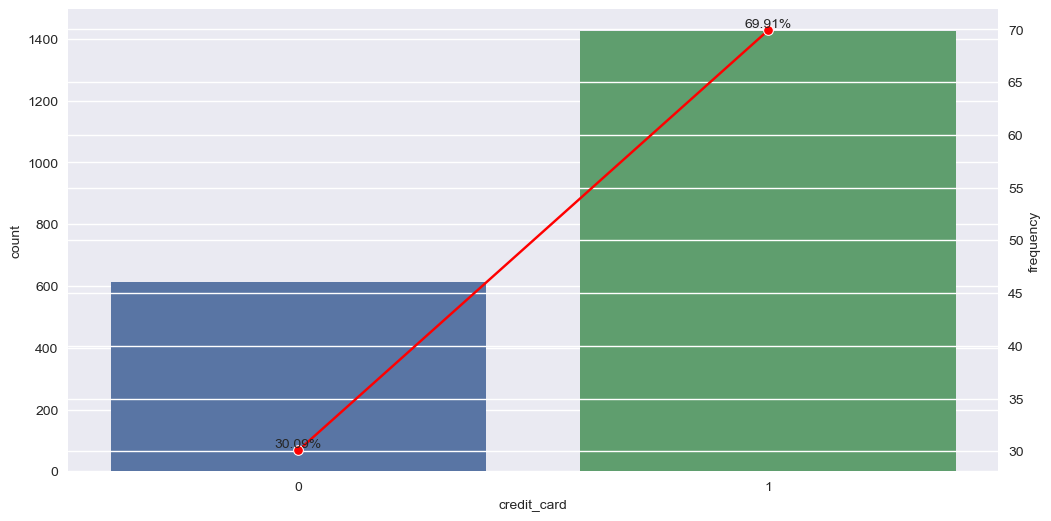

In [37]:
count_fre_plot(cre_card, 'credit_card')

* 69% of churn customers have credit card;
* people who have credit card are more likely to churn

* active_member

In [38]:
active = count_frequency(df_churn, 'active_member')
active

,active_member,count,frequency
0,0,1302,63.917526
1,1,735,36.082474


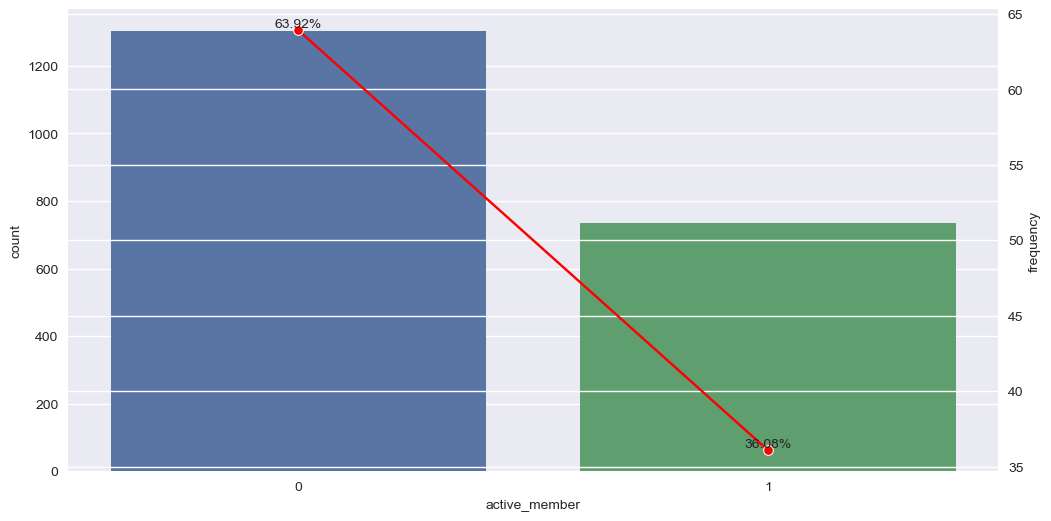

In [39]:
count_fre_plot(active, 'active_member')

* balance

In [40]:
count_frequency(df_churn, 'balance')

,balance,count,frequency
0,0.00,500,24.545901
681,3768.69,1,0.049092
342,12459.19,1,0.049092
311,23503.31,1,0.049092
1164,24043.45,1,0.049092
797,27755.97,1,0.049092
1445,28082.95,1,0.049092
1326,29602.08,1,0.049092
1279,33563.95,1,0.049092
956,36566.96,1,0.049092


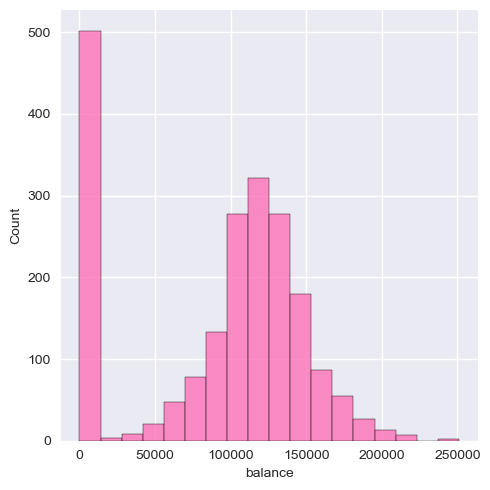

In [41]:
sns.displot(data=df_churn, x='balance',color = 'hotpink')

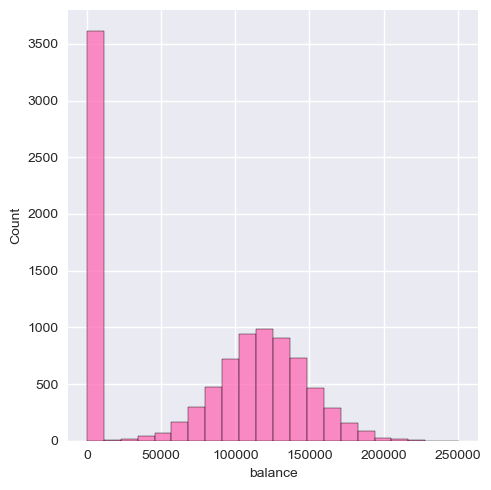

In [42]:
sns.displot(data=df, x='balance',color='hotpink')

<Axes: >

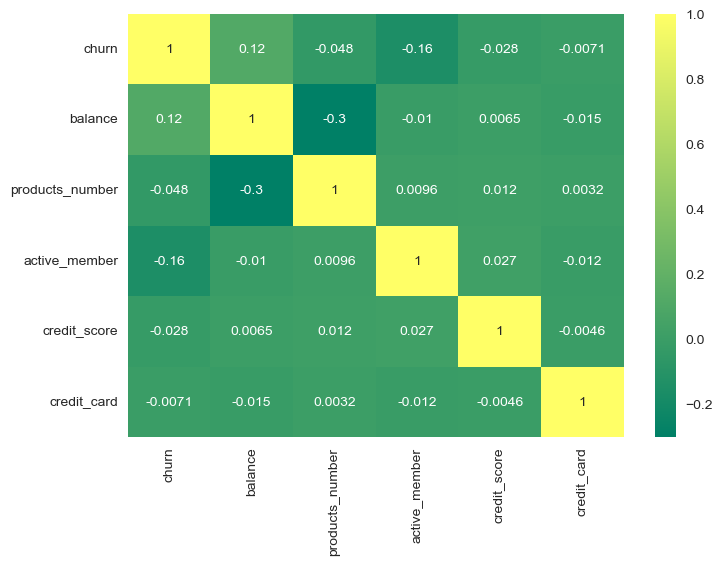

In [44]:
sns.heatmap(df[['churn','balance', 'products_number', 'active_member', 'credit_score', 'credit_card']].corr(), annot=True, cmap='summer')

# 4. Preprocessing

try differnt ways to handle the balance feature 

In [45]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [46]:
df.drop('customer_id', axis=1, inplace=True)

In [47]:
df['gender'] =df['gender'].apply(lambda x: 1 if x=='Female' else 0)
df['gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: gender, dtype: int64

In [48]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['country']= label_encoder.fit_transform(df['country'])

In [49]:
df = df.drop(['tenure','gender'],axis = 1)

In [50]:
df.head(5)

,credit_score,country,age,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619.0,0,42.0,0.00,1,1,1,101348.88,1
1,608.0,2,41.0,83807.86,1,0,1,112542.58,0
2,502.0,0,42.0,159660.80,3,1,0,113931.57,1
3,699.0,0,39.0,0.00,2,0,0,93826.63,0
4,850.0,2,43.0,125510.82,1,1,1,79084.10,0


In [51]:
X =df.drop('churn',axis=1)
Y=df['churn']

In [52]:
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split


In [53]:
X_train,X_test, y_train, y_test =train_test_split(X, Y, test_size=0.3, random_state=1)

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


In [55]:
X_test =scaler.transform(X_test)

# 5. KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [57]:
knn = KNeighborsClassifier()

In [58]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [59]:
y_pred = knn.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score
knn_test = accuracy_score(y_test, y_pred)

In [61]:
knn_test

0.8386666666666667

In [62]:
score_list=[]

In [63]:
score_list.append(knn_test)

# 6. Decision tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
clf= DecisionTreeClassifier(criterion="gini",max_depth= 5)

In [66]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [67]:
y_pred = clf.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score
clf_test=accuracy_score(y_test, y_pred)

In [69]:
clf_test

0.853

In [70]:
score_list.append(clf_test)

# 6.Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
lr = LogisticRegression()

In [73]:
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'penalty': ['l1', 'l2'],     # Regularization type ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear']      # Solver for optimization ('liblinear' for small datasets)
}

In [74]:
lr_cv = GridSearchCV(lr, param_grid, cv=5)

In [75]:
lr_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [76]:
lr_cv.score(X_train,y_train)

0.8067142857142857

In [77]:
lr_test = lr_cv.score(X_test,y_test)

In [78]:
score_list.append(lr_test)

# Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [80]:
y_pred = rf.predict(X_test)

In [81]:
rf_test = accuracy_score(y_test,y_pred)

In [82]:
rf_test

0.8503333333333334

In [83]:
score_list.append(rf_test)

In [84]:
score_list

[0.8386666666666667, 0.853, 0.8053333333333333, 0.8503333333333334]

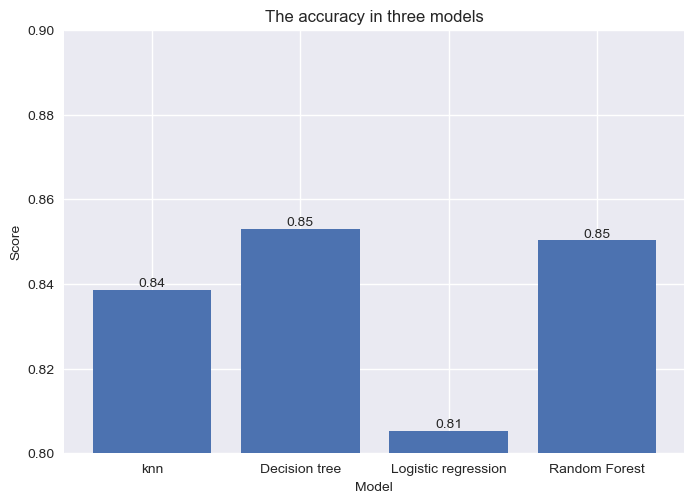

In [85]:
plt.bar(['knn', 'Decision tree','Logistic regression','Random Forest'], score_list)
plt.ylim(0.8, 0.9)
for x, y in enumerate(score_list):
    plt.text(x, y, str(round(y, 2)), ha='center', va='bottom')
plt.title('The accuracy in three models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()

* The decision tree can outperform other two models.

In [86]:
from joblib import dump

dump(rf, './../Savedmodels/bank_churn_model1.joblib')

['./../Savedmodels/bank_churn_model1.joblib']